# Итоговая работа PYDP-25

Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

Признаки:
1. **satisfaction_level** - Уровень удовлетворенности работой
2. **Last_evaluation** - Время с момента последней оценки в годах
3. **number_projects** - Количество проектов, выполненных за время работы
4. **average_monthly_hours** - Среднее количество часов на рабочем месте в месяц
5. **time_spend_company** - Стаж работы в компании в годах
6. **work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. **left** - уволился ли сотрудник
8. **promotion_last_5years** - повышался ли сотрудник за последние пять лет
9. **department** - отдел в котором работает сотрудник
10. **salary** - относительный уровень зарплаты

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import stats
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from pylab import rcParams

# 1. Загрузите файл HR.csv в pandas dataframe

In [2]:
df = pd.read_csv('HR.csv') #загрузка файла в dataframe

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Убедимся, что в данных нет пропусков.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Посмотрим, какие значения есть в текстовых столбцах.
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [5]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

# 2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

In [6]:
df.describe()

# В данной таблице можем увидеть рассчитанные среднее, медиану, минимум, максимум, сред. отклонение.

# По данной таблице можно увидеть, что сотрудников с повышением за последние 5 лет очень мало (среднее всего 0.02)

# Также видно, что в полях satisfaction_level, last_evaluation, number_project, average_minthly_hours
# значения среднего и медианы достаточно близки друг к другу.

# В поле time_spend_company среднее больше медианного значения.



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df.mode().loc[0] # расчет моды

# По значениям моды видим следующие данные:
# - чаще всего встречается низкий уровень удовлетворенности работой (0.1);
# - больше всего сотрудников в отделе подаж;
# - чаще всего у сотрудников низкая зарплата;
# - количество проектов за время работы чаще всего 4 (что совпадает и со средним и с медианой);

satisfaction_level         0.1
last_evaluation           0.55
number_project             4.0
average_montly_hours       135
time_spend_company         3.0
Work_accident              0.0
left                       0.0
promotion_last_5years      0.0
department               sales
salary                     low
Name: 0, dtype: object

# 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
# Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [8]:
# Сначала построим матрицу корреляций.
df_corr = df.corr()

df_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

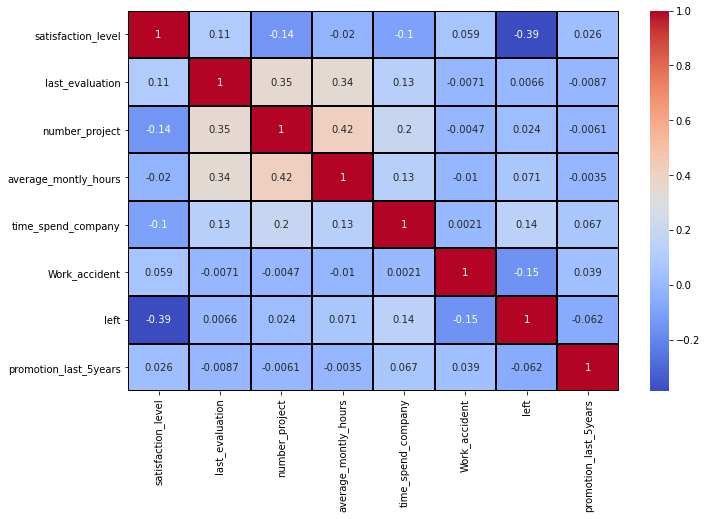

In [10]:
# Теперь визуализируем данную матрицу при помощи heatmap

rcParams['figure.figsize'] = 11,7
sns.heatmap(df_corr, annot=True,cmap='coolwarm',linewidths=1, linecolor='Black')

In [11]:
# Видим, что наиболее скоррелированные переменные - увольнение сотрудника и уровень его удовлетворенности.
# Зависимость обратная, т.е. чем лучше удовлетворенность сотрудника, тем меньше вероятность его ухода.

# Также можно выделить зависимость number_project и average_monthly_hours.
# Здесь прямая зависимость: чем больше проектов, тем больше среднее количество часов на рабочем месте.

# Также видна зависимость переменных:
# - last_evaluation и number_project (прямая 0.35);
# - last_evaluation и average_monthly_hours (прямая 0.34).

In [12]:
# Наименее скоррелированные переменные:
# - time_spend_company и work_accident. Т.е. количество несчастных случаев не зависит от стажа работы.
# - average_monthly_hours и promotion_last_5_years. Т.е. наличие повышения за посление 5 лет никак не зависит
# от среднего количества часов на рабочем месте.

# 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [13]:
# Создадим датафрейм с департаментом и количеством сотрудников в нём.
df_count_department = pd.Series(df.groupby('department')['department'].count().sort_values(), name='quantity').to_frame().reset_index()
df_count_department

,department,quantity
0,management,630
1,hr,739
2,accounting,767
3,RandD,787
4,marketing,858
5,product_mng,902
6,IT,1227
7,support,2229
8,technical,2720
9,sales,4140


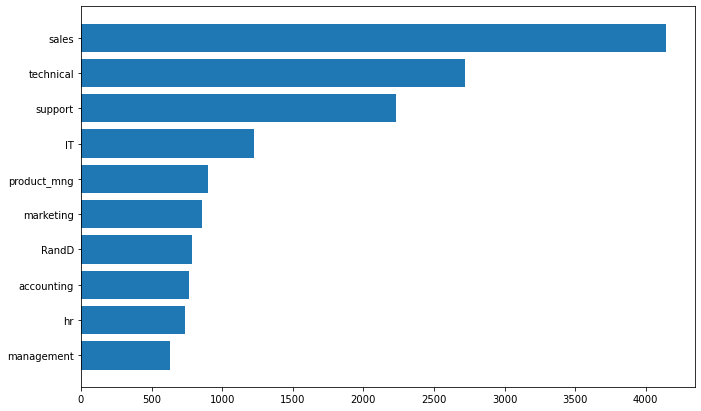

In [14]:
# Визуализируем количество сотрудников в департаментах.
# Больше всего сотрудников в департаментах sales, technical, support и IT.
plt.barh(y=df_count_department['department'], width=df_count_department['quantity']);

# 5. Показать распределение сотрудников по зарплатам.

In [15]:
# Создадим датафрейм с зарплатой и количеством сотрудников.
df_count_salary = pd.Series(df.groupby('salary')['salary'].count(), name='quantity').to_frame().reset_index()

df_count_salary.style.bar(align='mid',color='lightgreen')

,salary,quantity
0,high,1237
1,low,7316
2,medium,6446


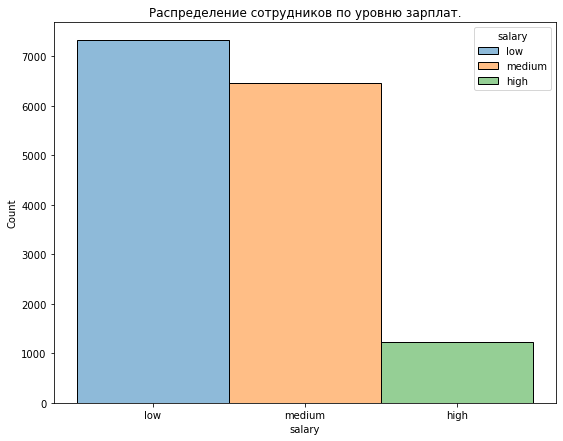

In [17]:
# Визуализируем количество сотрудников по уровню зарплат.
rcParams['figure.figsize'] = 9,7
sns.histplot(data=df, x="salary",hue='salary')
plt.title('Распределение сотрудников по уровню зарплат.')
plt.show()

In [ ]:
# По визуализации видно, что большинство сотрудников со средней и низкой зарплатой.
# Сотрудников с высокой зарплатой меньшинство.

# 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [18]:
# Создадим датафрейм с зарплатой и количеством сотрудников.
df_count_salary_department = pd.Series(df.groupby(['department','salary'])['salary'].count(),name='quantity').to_frame().reset_index()

df_count_salary_department.sort_values('quantity',ascending=False).style.bar(align='mid',color='lightgreen')

,department,salary,quantity
22,sales,low,2099
23,sales,medium,1772
28,technical,low,1372
29,technical,medium,1147
25,support,low,1146
26,support,medium,942
1,IT,low,609
2,IT,medium,535
19,product_mng,low,451
16,marketing,low,402


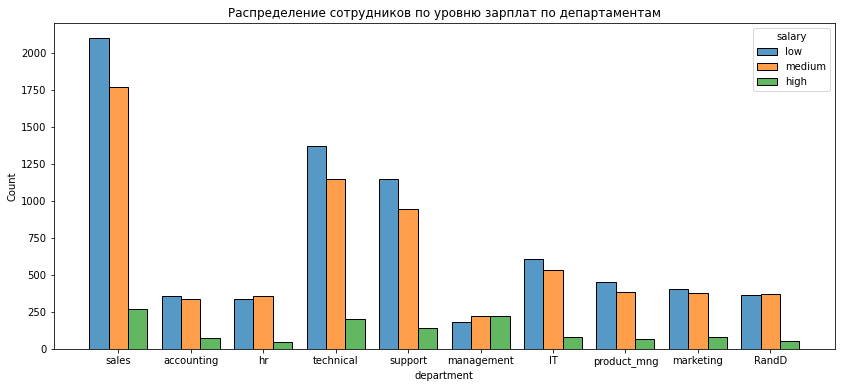

In [20]:
# Визуализируем количество сотрудников по уровню зарплат по департаментам.
rcParams['figure.figsize'] = 14,6
sns.histplot(data=df, x="department",hue='salary',multiple='dodge',shrink=.8)
plt.title('Распределение сотрудников по уровню зарплат по департаментам')
plt.show()

In [ ]:
# По визуализации видно, что почти во всех департаментах преобладают низкие и средние зарплаты.
# Исключение департамент management. Т.е. у управленческого состава доля высоких зарплат заметно выше.

# 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [21]:
# Сформируем две гипотезы:
# H0 - Сотрудники с высоким и низким окладом проводят на работе одинаковое количество времени.
# H1 - Сотрудники с высоким и низким окладом проводят на работе разное количество времени.

# Сформируем данные среднего времени на работе в месяц для двух типов зарплат.
df_time_high = df[df['salary'] == 'high']['average_montly_hours']
df_time_low = df[df['salary'] == 'low']['average_montly_hours']

# Возьмем уровень статистической значимости 5%
alpha = 0.05

# Посчитаем pvalue методом дисперсионного анализа.
pvalue = stats.f_oneway(df_time_high,df_time_low)[1]

# Интерпретируем результат
print('\nРезультат проверки гипотез:')
print(f'pvalue = {round(pvalue,3)}')
if pvalue <= alpha:
  print('Отвергаем нулевую гипотезу. Сотрудники с высоким и низким окладом проводят на работе разное количество времени')
else:
  print('Принимаем нулевую гипотезу. Сотрудники с высоким и низким окладом проводят на работе одинаковое количество времени')


Результат проверки гипотез:
pvalue = 0.466
Принимаем нулевую гипотезу. Сотрудники с высоким и низким окладом проводят на работе одинаковое количество времени


In [22]:
# Также проверим наши гипотезы методом Манна-Уитни

pvalue_2 = mannwhitneyu(df_time_high, df_time_low)[1]

# Интерпретируем результат
print('\nРезультат проверки гипотез:')
print(f'pvalue = {round(pvalue_2,3)}')
if pvalue_2 <= alpha:
  print('Отвергаем нулевую гипотезу. Сотрудники с высоким и низким окладом проводят на работе разное количество времени')
else:
  print('Принимаем нулевую гипотезу. Сотрудники с высоким и низким окладом проводят на работе одинаковое количество времени')


Результат проверки гипотез:
pvalue = 0.412
Принимаем нулевую гипотезу. Сотрудники с высоким и низким окладом проводят на работе одинаковое количество времени


In [ ]:
# Результаты 2-х методов говорят о том, что с вероятностью 95% сотрудники с высоким и низким окладом
# проводят на работе одинаковое количество времени.

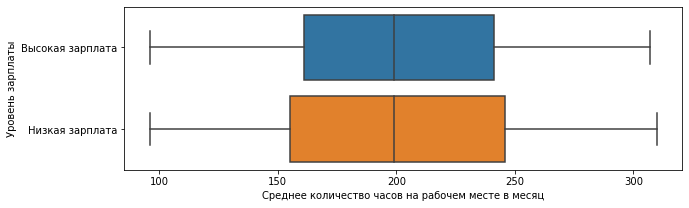

In [23]:
# Визуализируем резульаты через boxplot
work_time =  list(df_time_high) + list(df_time_low)
salary_level = ['Высокая зарплата']*len(df_time_high) + ['Низкая зарплата']*len(df_time_low)
df_mid = pd.DataFrame()
df_mid['Среднее количество часов на рабочем месте в месяц'] = work_time
df_mid['Уровень зарплаты'] = salary_level

rcParams['figure.figsize'] = 10,3

ax = sns.boxplot(x='Среднее количество часов на рабочем месте в месяц', y='Уровень зарплаты', data=df_mid)
plt.show()

In [ ]:
# Визуализация также подтверждает, что различий в среднем времени на работе в месяц для сотрудников
# с низкими и с высокими зарпалатами нет.

# 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [61]:
left_type = ['неуволившихся','уволившихся']

for i in range(2): 
    print(f'Показатели для {left_type[i]} сотрудников:\n')
   
    # Считаем долу сотрудников с повышением за последние 5 лет
    a = df[df['left'] == i]['promotion_last_5years'].count()
    b = df[(df['left'] == i) & (df['promotion_last_5years']==1)]['left'].count()
    print(f'Доля сотрудников с повышением: {round(b/a*100,2)}%') 
    
    # Считаем среднюю удовлетворенность сотрудников
    av_satisfaction = df[df['left'] == i]['satisfaction_level'].mean()
    print(f'Средняя степень удовлетворенности: {round(av_satisfaction*100,2)}%') 
    
    # Считаем среднее количество проектов сотрудников
    av_project = df[df['left'] == i]['number_project'].mean()
    print(f'Среднее количество проектов: {round(av_project,2)}\n') 
  

Показатели для неуволившихся сотрудников:

Доля сотрудников с повышением: 2.63%
Средняя степень удовлетворенности: 66.68%
Среднее количество проектов: 3.79

Показатели для уволившихся сотрудников:

Доля сотрудников с повышением: 0.53%
Средняя степень удовлетворенности: 44.01%
Среднее количество проектов: 3.86



In [64]:
# По посчитанным показателям видно, что для оставшихся сотрудников доля сотрудников с повышением выше.
# Также видно, что средняя степень удовлетворенности для уволившихся сотрудников ниже.
# Среднее количество проектов отличается не значительно.

# 9. Разделить данные на тестовую и обучающую выборки
# Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
# Оценить качество модели на тестовой выборки

In [132]:
# Формируем датафрейм без колонок с департаментом, зарплатой и меткой ухода из компании
df_for_model = df.drop(['left','salary','department'],axis=1) 

# Формируем данные из колонки left (метка ухода из компании)
df_left = df['left']

# Разделяем выборку на тренировочную и тестовую

X_train, X_test, y_train, y_test = train_test_split(df_for_model, df_left, test_size=0.25)

In [133]:
lda = LinearDiscriminantAnalysis()

# Обучаем данные
lda.fit(X_train, y_train)

# Делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])

In [134]:
# Расчет точности - отношение верных прогнозов к общему количеству позиций.
print(f'Точность модели на основе тестовой выборки равна {round(accuracy_score(y_test, lda.predict(X_test)),2)*100}')

Точность модели на основе тестовой выборки равна 76.0


In [ ]:
# Получили точность прогноза около 75%.
# Т.е. прогноз верен в 3-х случаях из 4-х.